In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [2]:
pip install category-encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.6 MB/s eta 0:00:00


In [3]:
from category_encoders import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [4]:
df = pd.read_csv("card_transdata_short.csv")

In [5]:
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
5,5.586408,13.261073,0.064768,1.0,0.0,0.0,0.0,0.0
6,3.724019,0.956838,0.278465,1.0,0.0,0.0,1.0,0.0
7,4.848247,0.320735,1.273050,1.0,0.0,1.0,0.0,0.0
8,0.876632,2.503609,1.516999,0.0,0.0,0.0,0.0,0.0
9,8.839047,2.970512,2.361683,1.0,0.0,0.0,1.0,0.0


In [6]:
df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

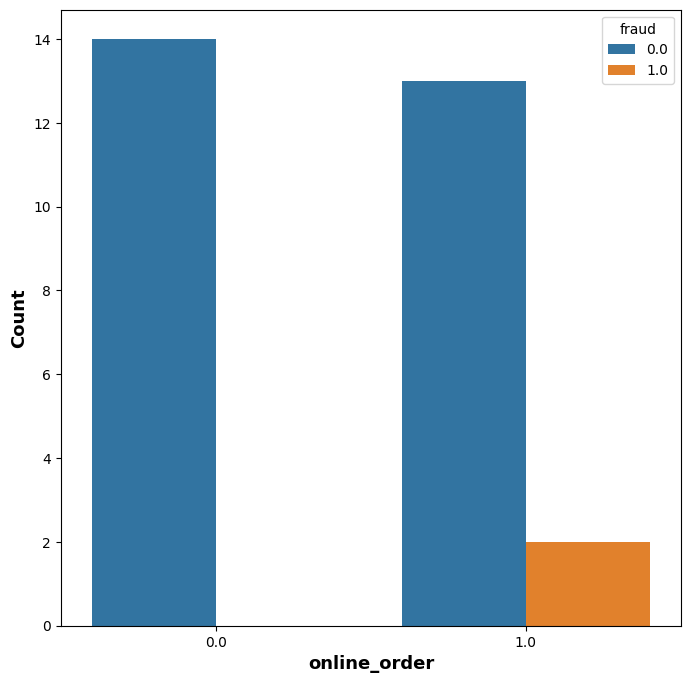

In [10]:
categorical_columns = ['ratio_to_median_purchase_price', 'distance_from_home', 'online_order']
for i, col in enumerate(categorical_columns):
    plt.figure(figsize = (8, 8))
    sns.countplot(
        data = df,
        x = col,
        hue = 'fraud',
    )
    plt.xlabel(col, size = 13, weight = 'bold')
    plt.ylabel('Count', size = 13, weight = 'bold')
    plt.show()

In [13]:
fig = px.scatter(df, x="fraud", y="ratio_to_median_purchase_price", color="fraud")
fig.show()

ValueError: ignored

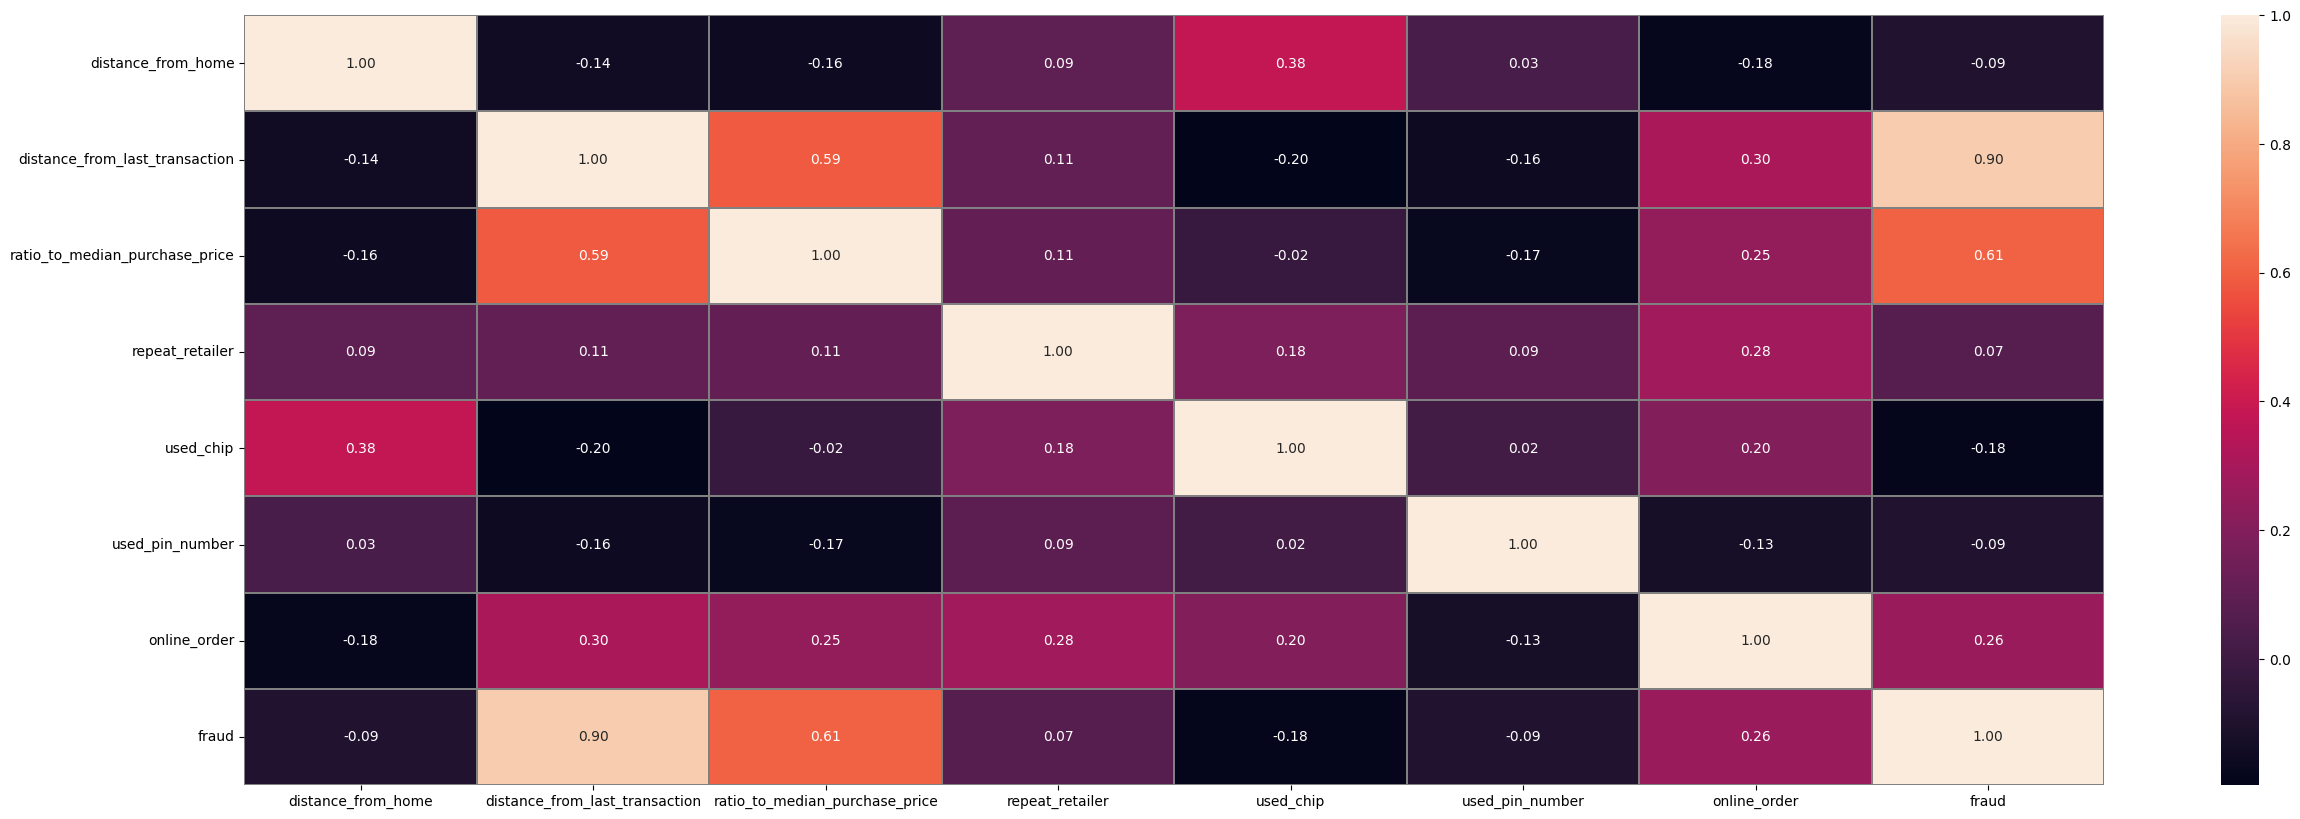

In [8]:
plt.figure(figsize = (30, 10))
sns.heatmap(
    df.corr(),
    annot = True,
    fmt = '.2f',
    linewidths=0.1,
    linecolor='gray',
)

plt.show()
# Table de corrélations à effectuer sur un plus grand échantillon de données

In [17]:
df2 = pd.read_csv("card_transdata.csv")

In [18]:
x_train, x_test, y_train, y_test = train_test_split(df2[["online_order", "ratio_to_median_purchase_price",
                                                        "distance_from_home"]],
                                                    df2.fraud,
                                                    test_size=0.2, random_state=42)

In [19]:
clf = LogisticRegression(random_state=42).fit(x_train, y_train) # .fit charge le modèle en données

In [21]:
clf.predict(x_test) # .predict exécute le modèle de prévision avec les données chargés puis affiche les 10 premiers éléments calculés

array([0., 0., 0., ..., 1., 0., 0.])

In [23]:
clf.score(x_train, y_train) # Score de prévision 0-100

0.94255125

In [24]:
clf.score(x_test, y_test)

0.94272